In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import re
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import linear_kernel
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/LHL_Final_Project/Written_Reviews/Beer_Recommendations_EDA_V01.csv')

Mounted at /content/drive


In [3]:
df.shape

(853486, 19)

User 10% of the dataset for testing

In [4]:
df = df.sample(frac=0.10, random_state=1)
df.shape

(85349, 19)

In [5]:
# Examples for user input data
beer_sample =  ['Molson Canadian Lager', 'Coors Light','Guinness Extra Stout (Original)', 'Porter', 'Blue Moon Belgian White', 
              'Hoegaarden Original White Ale', '90 Minute IPA', 'IPA', 'Amber Ale', 'Nut Brown Ale', 'Smoked Porter', 'Smokey The Beer', 
              'Wild Sour Series: Here Gose Nothin', "Monk's Café Flemish Sour Ale"]

text = ['the perfect beer for anyone who loves the summer months hanging with friends on patios and pairing anything barbecue with refreshing brews',
        'the perfect beer for anyone who loves the bitter flavour of black coffee or a strong grapefruit',
        'the perfect beer for anyone who loves coffee-crisp purposely burnt marshmallows and other bold rich flavours',
        'the perfect beer for anyone who loves dried fruit Werther’s Original candy bold flavours and just a pinch of sweet flavours',
        'the perfect beer for anyone who loves scotch campfires and smoked meats smoky brews can be enjoyed all year round',
        'the perfect beer for anyone whos morning routine consists of chugging a glass of orange juice or anyone who never says when when the waiter is adding pepper to your meal',
        'the perfect beers for anyone who drinks green tea in the morning instead of coffee puts cucumber in their water to give it flavour or is semi-addicted to sour penny candies']

In [6]:
# Function to input new user data
def rater(num):
    userID = input('What is your name? ')
    rating_list = []
    while num > 0:

        beer = (random.choice(beer_sample))
        print(beer)
        rating = input("Rate this beer on a scale of 1-5. If you have not tried it, rate how interested you are in trying it:\n")
        if rating == 'n':
            continue
        else:
            rating_one_beer = {'username':userID,'beer_name':beer,'user_overall_score':rating}
            rating_list.append(rating_one_beer) 
            num -= 1
    return rating_list
    
# Function to provide recommendations
def rec(testSubject, k):
  
    testUserInnerID =  trainset_newUser.to_inner_uid(testSubject)
    similarityRow = simsMatrix[testUserInnerID]

    similarUsers = []
    for innerID, score in enumerate(similarityRow):
        if (innerID != testUserInnerID):
            similarUsers.append( (innerID, score) )
        
    kNeighbors = heapq.nlargest(k, similarUsers, key=lambda t: t[1])

    candidates = defaultdict(float)
    for similarUser in kNeighbors:
        innerID = similarUser[0]
        userSimilarityScore = similarUser[1]
        theirRatings = trainset_newUser.ur[innerID]
        for rating in theirRatings:
            candidates[rating[0]] += (rating[1] / 5.0) * userSimilarityScore

    drank = {}
    for itemID, rating in trainset_newUser.ur[testUserInnerID]:
        drank[itemID] = 1   
    
    pos = 0
    for itemID, ratingSum in sorted(candidates.items(), key=itemgetter(1), reverse=True):
        if not itemID in drank:
            beer_id = trainset_newUser.to_raw_iid(itemID)
            print(beer_id)
            pos += 1
            if (pos >= k):
                break
    return

In [7]:
user = rater(7)
user = pd.DataFrame(user)


user['brewery_name'] =  pd.np.where(user.beer_name.str.contains("Canadian"), 'Molson Coors Canada',
                        pd.np.where(user.beer_name.str.contains("Coors"), 'Coors Brewing Company (Molson-Coors)',
                        pd.np.where(user.beer_name.str.contains("Guinness"), 'Guinness Ltd.',
                        pd.np.where(user.beer_name.str.contains("Porter"), 'Founders Brewing Company',
                        pd.np.where(user.beer_name.str.contains("Blue Moon"), 'Coors Brewing Company MolsonCoors',
                        pd.np.where(user.beer_name.str.contains("Hoegaarden"), 'Brouwerij van Hoegaarden',
                        pd.np.where(user.beer_name.str.contains("90 Minute"), 'Dogfish Head Craft Brewery',
                        pd.np.where(user.beer_name.str.contains("IPA"), 'Harpoon Brewery Beer Hall',
                        pd.np.where(user.beer_name.str.contains("Amber Ale"), 'Bells Brewery Eccentric Café General Store',
                        pd.np.where(user.beer_name.str.contains("Nut Brown Ale"), 'Samuel Smith Old Brewery Tadcaster',
                        pd.np.where(user.beer_name.str.contains("Smoked Porter"), 'Stone Brewing',
                        pd.np.where(user.beer_name.str.contains("ChurchKey Holy Smoke Scotch Ale"), 'ChurchKey Brewing Company',
                        pd.np.where(user.beer_name.str.contains("Flemish"), 'Brouwerij Van Steenberge NV', 'DESTIHL Brewery')))))))))))))

user['beer_id'] = pd.np.where(user.beer_name.str.contains("Canadian"), '1312.0',
                  pd.np.where(user.beer_name.str.contains("Coors"), '837.0',
                  pd.np.where(user.beer_name.str.contains("Guinness"), '650.0',
                  pd.np.where(user.beer_name.str.contains("Porter"), '7348.0',
                  pd.np.where(user.beer_name.str.contains("Blue Moon"), '1212.0',
                  pd.np.where(user.beer_name.str.contains("Hoegaarden"), '248.0',
                  pd.np.where(user.beer_name.str.contains("90 Minute"), '2093.0',
                  pd.np.where(user.beer_name.str.contains("IPA"), '311.0',
                  pd.np.where(user.beer_name.str.contains("Amber Ale"), '794.0',
                  pd.np.where(user.beer_name.str.contains("Nut Brown Ale"), '576.0',
                  pd.np.where(user.beer_name.str.contains("Smoked Porter"), '90.0',
                  pd.np.where(user.beer_name.str.contains("ChurchKey Holy Smoke Scotch Ale"), '7428.0',
                  pd.np.where(user.beer_name.str.contains("Flemish"), '10482.0', '133043.0')))))))))))))

user['text'] = pd.np.where(user.beer_name.str.contains("Lager"), text[0],
               pd.np.where(user.beer_name.str.contains("Coors"), text[0],
               pd.np.where(user.beer_name.str.contains("IPA"), text[1],
               pd.np.where(user.beer_name.str.contains("Porter"), text[2],
               pd.np.where(user.beer_name.str.contains("Stout"), text[2],
               pd.np.where(user.beer_name.str.contains("Amber"), text[3],
               pd.np.where(user.beer_name.str.contains("Brown Ale"), text[3],
               pd.np.where(user.beer_name.str.contains("Smoke"), text[4],
               pd.np.where(user.beer_name.str.contains("White"), text[5], text[6])))))))))

What is your name? CraigLynch
Hoegaarden Original White Ale
Rate this beer on a scale of 1-5. If you have not tried it, rate how interested you are in trying it:
1
Wild Sour Series: Here Gose Nothin
Rate this beer on a scale of 1-5. If you have not tried it, rate how interested you are in trying it:
3
90 Minute IPA
Rate this beer on a scale of 1-5. If you have not tried it, rate how interested you are in trying it:
4
Smoked Porter
Rate this beer on a scale of 1-5. If you have not tried it, rate how interested you are in trying it:
4
Smoked Porter
Rate this beer on a scale of 1-5. If you have not tried it, rate how interested you are in trying it:
4
Wild Sour Series: Here Gose Nothin
Rate this beer on a scale of 1-5. If you have not tried it, rate how interested you are in trying it:
2
Guinness Extra Stout (Original)
Rate this beer on a scale of 1-5. If you have not tried it, rate how interested you are in trying it:
5


In [8]:
new_ratings_df = df.append(user,ignore_index=True)
new_ratings_df.tail()

,beer_id,username,date,text,look,smell,taste,feel,user_overall_score,avg_score,beer_name,style,abv,brewery_id,brewery_name,country,count,style_count,Name
85351,2093.0,CraigLynch,NaN,the perfect beer for anyone who loves the bitt...,NaN,NaN,NaN,NaN,4,NaN,90 Minute IPA,NaN,NaN,NaN,Dogfish Head Craft Brewery,NaN,NaN,NaN,NaN
85352,7348.0,CraigLynch,NaN,the perfect beer for anyone who loves coffee-c...,NaN,NaN,NaN,NaN,4,NaN,Smoked Porter,NaN,NaN,NaN,Founders Brewing Company,NaN,NaN,NaN,NaN
85353,7348.0,CraigLynch,NaN,the perfect beer for anyone who loves coffee-c...,NaN,NaN,NaN,NaN,4,NaN,Smoked Porter,NaN,NaN,NaN,Founders Brewing Company,NaN,NaN,NaN,NaN
85354,133043.0,CraigLynch,NaN,the perfect beers for anyone who drinks green ...,NaN,NaN,NaN,NaN,2,NaN,Wild Sour Series: Here Gose Nothin,NaN,NaN,NaN,DESTIHL Brewery,NaN,NaN,NaN,NaN
85355,650.0,CraigLynch,NaN,the perfect beer for anyone who loves coffee-c...,NaN,NaN,NaN,NaN,5,NaN,Guinness Extra Stout (Original),NaN,NaN,NaN,Guinness Ltd.,NaN,NaN,NaN,NaN


# Content-Based Recommender

In [9]:
# Remove Punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
new_ratings_df['text'] = new_ratings_df['text'].apply(remove_punctuations)

# Make Strings Lowercase
new_ratings_df['text'] = new_ratings_df['text'].str.lower()

# Remove Digits
new_ratings_df['text'] = new_ratings_df['text'].str.replace('\d+', '')

#get info and find how many unique beers there are
print('There are',new_ratings_df['beer_id'].nunique() ,'unique beer.')

There are 1714 unique beer.


In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
df = new_ratings_df.copy()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [11]:
#define lemmatizer
lemmatizer = WordNetLemmatizer()

#remove stopwords
stop = stopwords.words('english')
df['without_stopwords']  = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#lemmatize/tokenize/make everything lowercase/remove punctuation
df['lemmatized_text'] = df['without_stopwords'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x)))]))

#remove digitsvb
df['lemmatized_text'] = df['lemmatized_text'].str.replace('\d+', '')

#add some more stopwords
newStopWords = ['beer', 'one', 'would', 'get', 'come', 'also', 'oz', 'could']
stop.extend(newStopWords)
df['lemmatized_text'] = df['lemmatized_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df['lemmatized_text'] = df['lemmatized_text'].astype('str')


# add some more stopwords
newStopWords = ['lager', 'porter', 'stout', 'brewery', 'ale', 'apa', 'ipa', 'ipas', 'belgian', 'red', 'brown', 'cream', 'black', 'amber',
               'golden', 'much', 'year', 'worth', 'english', 'german', 'american', 'stuff', 'pilsner', 'old', 'barleywine',
               'ri', 'imperial', 'non', 'dipa', 'iipa', 'dipas', 'pils', 'pilsener', 'sam', 'irish', 'brewpub', 'st',
               'adam', 'ml', 'tripel', 'quad', 'pa', 'ibu', 'ibus', 'series', 'bell', 'belgium', 'boston', 'city', 'coors',
               'dead', 'dfh', 'dog', 'dogfish', 'founder', 'im', 'imo', 'lagunitas', 'left', 'nevada', 'rogue', 'samuel', 'sierra',
               'southern', 'pint']
stop.extend(newStopWords)
df['lemmatized_text'] = df['lemmatized_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [12]:
nltk.download('averaged_perceptron_tagger')

df['lemmatized_text'] = df['lemmatized_text'].astype('str')

def nouns_adj(text):
    #Given a string of text, tokenize the text and pull out only the nouns and adjectives.
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

df['adjectives/nouns'] = df['lemmatized_text'].apply(nouns_adj)
df = df.dropna()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [13]:
#create new dataframe
beer_text = df[['beer_id', 'beer_name', 'style', 'brewery_name', 'Name', 'lemmatized_text', 'adjectives/nouns']]

#drop null values
beer_text = df.dropna(axis=0, subset=['adjectives/nouns'])

#group by beer, think of each beer as a "document"
grouped_beer_text = beer_text.groupby(['beer_id', 'brewery_name', 'beer_name', 'Name', 'style'])['adjectives/nouns'].agg(lambda col: ''.join(col))

#df
beer_text = pd.DataFrame(grouped_beer_text)
beer_text = beer_text.reset_index()

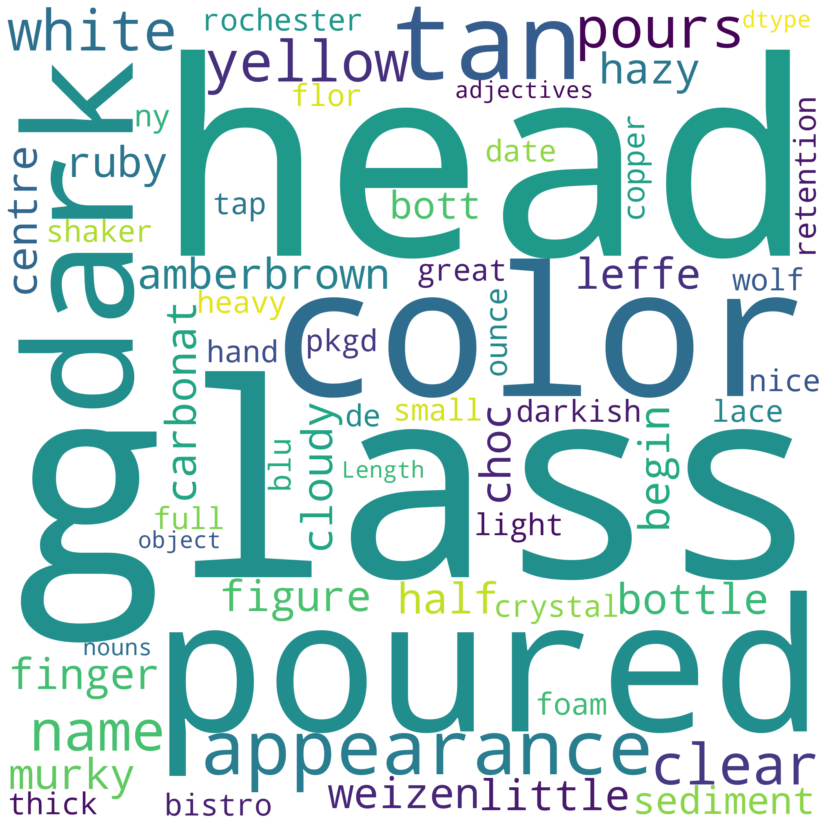

In [14]:
# Visualize


other_stopwords_to_remove = ['\\n', 'n', '\\', '>', 'nLines', 'nI',"n'"]
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords_a = set(STOPWORDS)
text = str(beer_text['adjectives/nouns'])
wordcloud = WordCloud(width = 2000, height = 2000, 
                background_color ='white', 
                max_words=200,
                stopwords = stopwords_a, 
                min_font_size = 10).generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
# using lemmatized_text, create the corpus
corpus = beer_text['adjectives/nouns']

# FEATURE EXTRACTION via tfidf vectorizer
tfidf_model = TfidfVectorizer(max_features=500,
                             max_df=0.25,
                             min_df=0.01)

tfidf_matrix = tfidf_model.fit_transform(corpus).todense()
print('The shape of the matrix is:', tfidf_matrix.shape)
tfidf_df = pd.DataFrame(tfidf_matrix)
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

The shape of the matrix is: (1709, 500)


,abundant,accent,acid,acrid,actual,additional,adequate,adjunct,air,airy,allspice,almond,anise,anyone,appreciate,area,aromatics,artificial,assault,attempt,attention,awhile,baker,barnyard,barrel,basic,bastard,bat,bean,become,becomes,beneath,beverage,biggest,blackberry,blanket,blonde,blood,blue,blueberry,...,vegetal,vibrant,victory,vigorous,vinegar,vinous,vintage,viscosity,wall,walnut,warmer,wash,wave,weather,wee,weight,weizen,welcome,west,whats,wheaty,whiskey,wife,wild,winner,wisp,wispy,wit,witbier,wonder,woodiness,worse,worthy,yeah,yeastiness,yellowish,yes,youll,young,zesty
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.218692,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.21542,0.000000,0.0,0.0,0.0,0.069625,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.074187,0.133461,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.073339,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.072697,0.000000,0.000000,0.000000,0.135221,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.133606,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.013715,0.0,0.0,0.000000,0.000000,0.028254,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.054785,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.012586,0.0,0.000000,0.000000,0.0,0.0,0.012356,0.0,0.0,0.0,0.013035,0.015443,0.0,0.013150,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.031387,0.000000,0.011326,0.000000,0.041145,0.0,0.025533,0.000000,0.0,0.0,0.000000,0.01578,0.000000,0.012004,0.0,0.000000,0.000000,0.0,0.000000,0.026708,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.031275,0.0,0.0,0.0,0.000000,0.000000,0.0,0.031652,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.014761,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.028781,0.0,0.0,0.0,0.017713,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.015401,0.000000,0.000000,0.000000,0.0,0.000000,0.030010,0.0,0.0,0.000000,0.00000,0.023234,0.014809,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.016001,0.0,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.023995,0.000000,0.049969,0.0,0.022552,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.024223,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.023257,0.0,...,0.0,0.021003,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.023025,0.0,0.048119,0.02736,0.000000,0.111020,0.000000,0.020030,0.000000,0.266819,0.0,0.000000,0.021511,0.0,0.0,0.044158,0.00000,0.000000,0.000000,0.0,0.025508,0.000000,0.0,0.047297,0.000000,0.0,0.000000,0.0,0.039783


In [16]:
# Calculate the cosine similarity of the matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Construct a reverse mapping of indices and beer names, and drop duplicate names, if any
indices = pd.Series(beer_text.index, index=beer_text['Name']).drop_duplicates()

In [17]:
# Function that takes in beer name as input and gives recommendations 
def content_recommender(title, cosine_sim=cosine_sim, df=beer_text, indices=indices):
    # Obtain the index of the beer that matches the name
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    beer_indices = [i[0] for i in sim_scores]

    
    return beer_text[['style', 'brewery_name', 'beer_name']].iloc[beer_indices]

In [18]:
content_recommender("Molson Coors Canada Molson Canadian Lager") 

,style,brewery_name,beer_name
162,American Adjunct Lager,Miller Brewing Co,Miller High Life
345,American Adjunct Lager,Coors Brewing Company MolsonCoors,Coors Banquet
206,American Adjunct Lager,Desnoes Geddes Limited,Red Stripe Jamaican Lager
357,American Adjunct Lager,Pabst Brewing Company,Pabst Blue Ribbon PBR
538,American Adjunct Lager,Miller Brewing Co,Miller Genuine Draft
276,American Adjunct Lager,Fosters Group Limited,Fosters Lager
348,American Adjunct Lager,Miller Brewing Co,Icehouse
200,American Adjunct Lager,AnheuserBusch,Busch Beer
771,American Adjunct Lager,Narragansett Brewing Co,Narragansett Lager
265,American Adjunct Lager,Hamms Brewing Co,Hamms


In [19]:
content_recommender("Stone Brewing Smoked Porter")

,style,brewery_name,beer_name
454,Smoke Porter,Alaskan Brewing Co,Alaskan Smoked Porter
783,Smoke Beer,Dark Horse Brewing Company,Fore Smoked Stout
356,German Rauchbier,Brauerei HellerTrum Schlenkerla,Aecht Schlenkerla Rauchbier Urbock
225,German Rauchbier,Brauerei HellerTrum Schlenkerla,Aecht Schlenkerla Rauchbier Märzen
1077,German Helles,Brauerei HellerTrum Schlenkerla,Aecht Schlenkerla Helles Lagerbier
1409,Smoke Porter,Yazoo Brewing Company,Sue
782,Smoke Porter,OFallon Brewery,Smoked Porter
1246,Baltic Porter,Surly Brewing Company,Smoke
1197,Smoke Porter,Stone Brewing,Smoked Porter Chipotle Peppers
1152,Smoke Porter,Left Hand Brewing Company,Smoke Jumper
